<h2> Step 1 : Get Data </h2>

Data : https://www.kaggle.com/ngbolin/mnist-dataset-digit-recognizer/data

<h2> Step 2 : Load Data </h2>

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
train = pd.read_csv("../../Data/mnist_train.csv")
test = pd.read_csv("../../Data/mnist_test.csv")
train.shape

(59999, 785)

In [3]:
train.head(2)

,5,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.608,0.609,0.610,0.611,0.612,0.613,0.614,0.615,0.616,0.617
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<h4> Create header </h4>

In [4]:
# Create header list
column_name = []
for i in range(785):
    string = "pixel" + str(i)
    column_name.append(string)

In [5]:
# Reload data with header
train = pd.read_csv("../../Data/mnist_train.csv", names=column_name)
train.shape

(60000, 785)

In [6]:
train.head(2)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<h4> Convert pixels to image </h4>

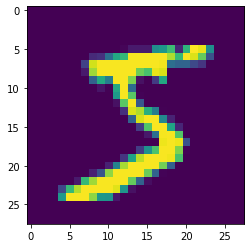

In [7]:
image = train.iloc[0,1:].values ## take numpy value of row 0(as label)and 1 to end (as features i.e. pixels)
image = image.reshape(28,28).astype('uint8') # reshape all pixel values
plt.imshow(image)

<h2> Step 2 : Prepare Data </h2>

<h3> Extracting features and label </h3>

In [8]:
label = train.iloc[:,0]
features = train.iloc[:,1:]
features.head(2)

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
label.head(2)

0    5
1    0
Name: pixel0, dtype: int64

In [10]:
label.unique()

array([5, 0, 4, 1, 9, 2, 3, 6, 7, 8], dtype=int64)

<h2>Spot-checking  ML algorithms</h2>

spot-checking is intended to evaluate a diverse set of algorithms rapidly and provide a rough first-cut result. This first cut result may be used to get an idea if a problem or problem representation is indeed predictable, and if so, the types of algorithms that may be worth investigating further for the problem

In [11]:
%run ./01_2_spot_check_helper.ipynb

Defined 35 classifiers
>log_clf: 0.915 (+/-0.008)
>logcv_clf: 0.915 (+/-0.008)
>ridge_clf-0.1: 0.849 (+/-0.014)
>ridge_clf-0.2: 0.849 (+/-0.014)
>ridge_clf-0.3: 0.849 (+/-0.014)
>ridge_clf-0.4: 0.849 (+/-0.014)
>ridge_clf-0.5: 0.849 (+/-0.014)
>ridge_clf-0.6: 0.849 (+/-0.014)
>ridge_clf-0.7: 0.850 (+/-0.014)
>ridge_clf-0.8: 0.850 (+/-0.014)
>ridge_clf-0.9: 0.850 (+/-0.014)
>ridge_clf-1.0: 0.850 (+/-0.014)
>ridgeCV_clf: 0.850 (+/-0.014)
>lsvc_clf: 0.912 (+/-0.009)
>knn_clf-1: 0.970 (+/-0.004)
>knn_clf-3: 0.971 (+/-0.003)
>knn_clf-5: 0.970 (+/-0.004)
>knn_clf-7: 0.969 (+/-0.003)
>knn_clf-9: 0.967 (+/-0.004)
>knn_clf-11: 0.966 (+/-0.004)
>knn_clf-13: 0.965 (+/-0.004)
>knn_clf-15: 0.964 (+/-0.004)
>knn_clf-17: 0.963 (+/-0.004)
>knn_clf-19: 0.961 (+/-0.004)
>knn_clf-21: 0.961 (+/-0.005)
>knn_clf-23: 0.960 (+/-0.005)
>knn_clf-25: 0.959 (+/-0.005)
>knn_clf-27: 0.958 (+/-0.005)
>knn_clf-29: 0.957 (+/-0.005)
>dt_clf: 0.870 (+/-0.011)
>et_clf: 0.812 (+/-0.012)
>gnb_clf: 0.561 (+/-0.009)
>mlp_clf

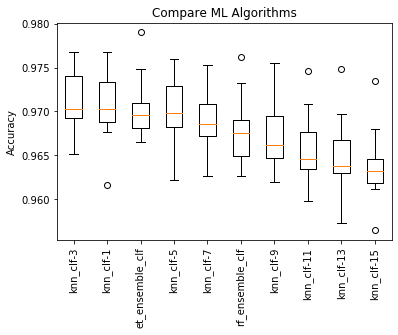

In [12]:
# get list of different classifiers
classifiers= define_classifiers()
# evaluate each classifiers by passing feature data and lable data
results = evaluate_models(features,label, classifiers)
# summarize results
summarize_results(results)